# Weight Matrix Plot

This Jupyter Notebook is used to visualize the weight matrix used in the RFX+CPG Controller. This allows to visually perceive the values of the connection weights between the motor primtives and the 9 RFX muscles from the musculoskeletal model from Song, 2015. 

In [5]:
# Imports
from wNMF import wNMF
import numpy as np
import matplotlib.pyplot as plt   # allows to plot charts
from pylab import imshow,colorbar
import pandas as pd              
import seaborn as sns    # python data visualization library based on matplotlib
import glob
import pickle
import os 

# To be allow to zoom in on the plots, uncomment the following lines
%matplotlib inline
# import mpld3
# mpld3.enable_notebook()

sns.set(style="darkgrid")

# Measurement file
file_path = './control/params_2D_FDB_CPG_5MP.txt'

First, the parameter file is read. It contains the 37 parameters from the RFX-controller as well as the parameters from the CPG controller, namely:
- For 4MP: 4 centers, 4 sigmas, 36 connection weights, leading to 44 CPG parameters
- For 5MP: 5 centers, 5 sigmas, 45 connection weights, leading to 55 CPG parameters

In [6]:
# Read a file into an array
def readFile(fileName):
    with open(fileName, 'r') as f:
        params_array = f.read().splitlines()    # Puts the file into an array
    return params_array

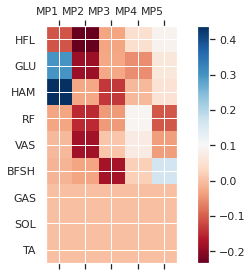

In [7]:
params = readFile(file_path)

# Define the number of motor primitives used in optimization
N_RBF = 5

# Separate params between the RFX-only parameters and the CPG-only parameters
rfx_params = params[:37]
cpg_params = params[37:]

# Remove center and sigmas from cpg_params to keep only the weights
weights_1D = params[47:] # for 5MP, change in 47, for 4MP change in 45

weights_matrix = np.reshape(weights_1D, (-1, N_RBF)) 
weights_matrix = weights_matrix.astype(float)

ones = np.ones((6,N_RBF), dtype=float)
zeros = np.zeros((3,N_RBF), dtype=float)
matrix = np.r_[ones, zeros]

axis_x = ["MP1", "MP2", "MP3", "MP4", "MP5"] # add "MP5" for 5MP, or remove for 4MP
axis_y = ["HFL", "GLU", "HAM", "RF", "VAS", "BFSH", "GAS", "SOL", "TA"]

fig, ax = plt.subplots()
im = ax.matshow(weights_matrix*matrix, cmap='RdBu', interpolation=None)

# We want to show all ticks...
ax.set_xticks(np.arange(len(axis_x)))
ax.set_yticks(np.arange(len(axis_y)))
# ... and label them with the respective list entries
ax.set_xticklabels(axis_x)
ax.set_yticklabels(axis_y)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=0, ha="right",
         rotation_mode="anchor")

# Visualization of the weight matrix
colorbar(im)
fig.tight_layout()
plt.show()
